# The Future of Detroit Auto

Authors : Rishi Ahuja

General Motors is the largest automanufacturing company headquartered in the United Staes. With the recent shift to Electric Vehicles, GM has hired Ahuja Consulting to predict the future price of gasoline to decide whether to invest drastically more in EV.

# Business Understanding

Our goal is to inform General Motors if the price of Gasoline will continue to raise over time and because of our results, should General Motors decide to invest significantly more in Electric Vehicles. The cost of a barrel is nearing an all time high and ccording to the US Department of Energy, Gasoline has to be at $2.50 a gallon to make the cost of owning and operating an EV worth it.

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import warnings

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

We initially generated some charts to examine the data at a high level.  
Our first chart plotted the price of WTI Oil and the Price of Henry Hub Gas. 

In [64]:
df_oil = pd.read_csv("data/Cushing_OK_WTI_Spot_Price_FOB_Daily.csv")
df_oil.head()

,Day,Series ID: PET.RWTC.D Dollars per Barrel
0,6/28/22,113.66
1,6/27/22,111.44
2,6/24/22,109.07
3,6/23/22,105.75
4,6/22/22,106.22


In [65]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Day                                       9206 non-null   object 
 1   Series ID: PET.RWTC.D Dollars per Barrel  9206 non-null   float64
dtypes: float64(1), object(1)
memory usage: 144.0+ KB


In [66]:
df_natgas = pd.read_csv("data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv")

In [67]:
df_natgas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 2 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Day                                              6424 non-null   object 
 1   Series ID: NG.RNGWHHD.D Dollars per Million Btu  6423 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.5+ KB


In [68]:
df_natgas.head()

,Day,Series ID: NG.RNGWHHD.D Dollars per Million Btu
0,6/28/22,6.66
1,6/27/22,6.09
2,6/24/22,5.80
3,6/23/22,6.54
4,6/22/22,6.76


In [69]:
df_oilgas = pd.merge(df_oil, df_natgas, on=["Day"])

In [70]:
df_oilgas

,Day,Series ID: PET.RWTC.D Dollars per Barrel,Series ID: NG.RNGWHHD.D Dollars per Million Btu
0,6/28/22,113.66,6.66
1,6/27/22,111.44,6.09
2,6/24/22,109.07,5.80
3,6/23/22,105.75,6.54
4,6/22/22,106.22,6.76
...,...,...,...
6386,1/13/97,25.20,4.00
6387,1/10/97,26.15,3.92
6388,1/9/97,26.30,3.61
6389,1/8/97,26.55,3.80


In [71]:
df_oilgas.rename(columns = {'Series ID: PET.RWTC.D Dollars per Barrel':'WTI Oil', 'Series ID: NG.RNGWHHD.D Dollars per Million Btu':'Henry Hub Gas'}, inplace = True)

In [72]:
df_oilgas.head()

,Day,WTI Oil,Henry Hub Gas
0,6/28/22,113.66,6.66
1,6/27/22,111.44,6.09
2,6/24/22,109.07,5.80
3,6/23/22,105.75,6.54
4,6/22/22,106.22,6.76


In [73]:
df_oilgas['Day'] = pd.to_datetime(df_oilgas['Day'])

In [74]:
df_oilgas = df_oilgas.sort_values("Day")

In [75]:
df_oilgas.head()

,Day,WTI Oil,Henry Hub Gas
6390,1997-01-07,26.25,3.82
6389,1997-01-08,26.55,3.80
6388,1997-01-09,26.30,3.61
6387,1997-01-10,26.15,3.92
6386,1997-01-13,25.20,4.00


In [76]:
df_oilgas.rename(columns = {'Day':'Date' }, inplace = True)

<AxesSubplot:xlabel='Date'>

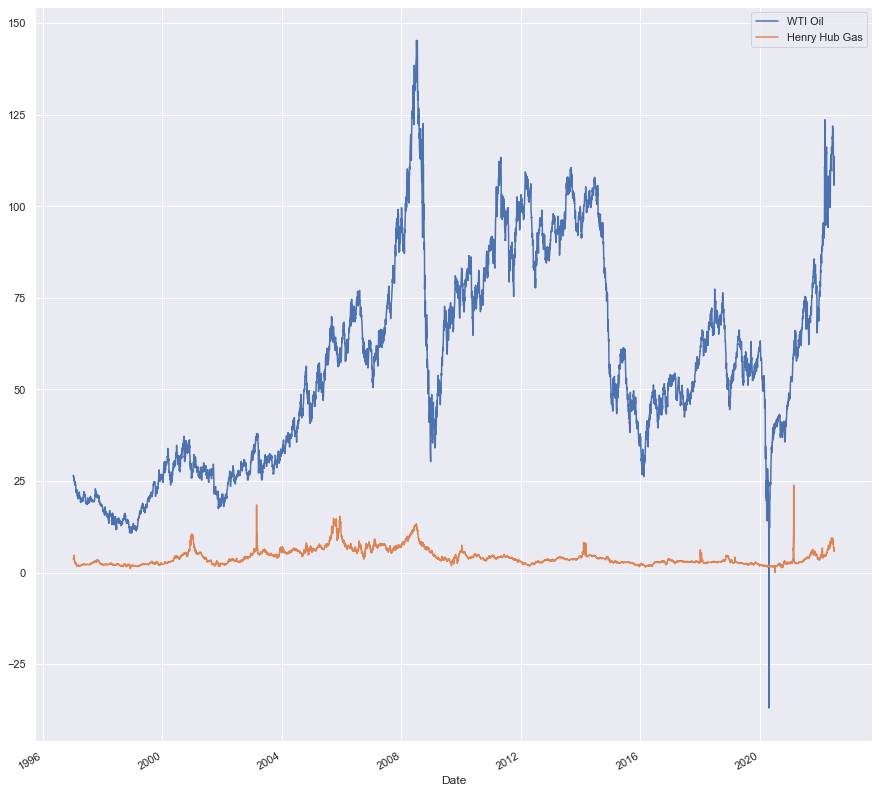

In [77]:
df_oilgas.plot(x="Date", y=["WTI Oil", "Henry Hub Gas"], kind="line", figsize=(15, 15))


We decided not to use this data becauase we were able to find the Weekly Gas Price According to the EIA. 

In [78]:
df = pd.read_csv("data/PET_PRI_GND_DCUS_NUS_W.csv")

In [79]:
print(df.head())

         Date  EIA Gasoline
0  1990-08-20         1.191
1  1990-08-27         1.245
2  1990-09-03         1.242
3  1990-09-10         1.252
4  1990-09-17         1.266


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1658 non-null   object 
 1   EIA Gasoline  1658 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.0+ KB


In [81]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [82]:
del df['Date']

In [83]:
df

,EIA Gasoline
Date,
1990-08-20,1.191
1990-08-27,1.245
1990-09-03,1.242
1990-09-10,1.252
1990-09-17,1.266
...,...
2022-06-06,4.702
2022-06-13,4.844
2022-06-20,4.798


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([ 6574.,  8035.,  9496., 10957., 12418., 13879., 15340., 16801.,
        18262., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

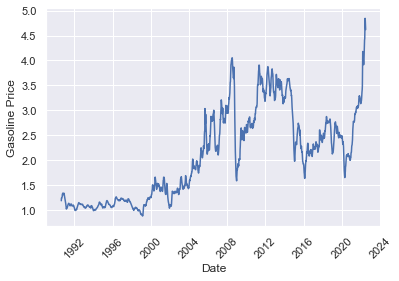

In [85]:
plt.plot(df.index, df['EIA Gasoline'], )
plt.ylabel('Gasoline Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

We Split this Data using a Train/Test Split using May 4, 2020 as our date. If you refer to the graph above you can see the negative Oil Price due to the COVID-19 Pandemic.

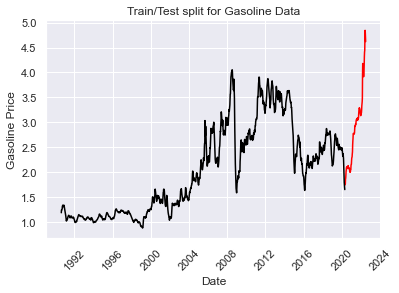

In [86]:
test_df = df[df.index < pd.to_datetime("2020-05-04", format='%Y-%m-%d')]
train_df = df[df.index > pd.to_datetime("2020-05-04", format='%Y-%m-%d')]

plt.plot(train_df, color = "red")
plt.plot(test_df, color = "black")
plt.ylabel('Gasoline Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Gasoline Data")
plt.show()

In [87]:
test_df_gas = test_df['EIA Gasoline']
test_df_gas = pd.DataFrame(test_df)
test_df_gas

,EIA Gasoline
Date,
1990-08-20,1.191
1990-08-27,1.245
1990-09-03,1.242
1990-09-10,1.252
1990-09-17,1.266
...,...
2020-03-30,1.886
2020-04-06,1.800
2020-04-13,1.735


In [88]:
train_df_gas = train_df['EIA Gasoline']
train_df_gas = pd.DataFrame(train_df)
train_df_gas

,EIA Gasoline
Date,
2020-05-11,1.750
2020-05-18,1.776
2020-05-25,1.870
2020-06-01,1.883
2020-06-08,1.947
...,...
2022-06-06,4.702
2022-06-13,4.844
2022-06-20,4.798


In [89]:
def Dickey_Fuller_Test(ts):
    
    dftest = adfuller(ts)        # Dickey-Fuller Test
    # To Test for Stationairity due to a Graph that is for the most part stationairy
    dfoutput = pd.Series(
                    dftest[0:4], 
                    index=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    )

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    return dfoutput

In [90]:
print("EIA Gasoline", '\n', Dickey_Fuller_Test(train_df_gas), '\n')

EIA Gasoline 
 Test Statistic                   0.710158
p-value                          0.990038
#Lags Used                       4.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



We used an ARIMA  model to predict and forecast future Gas prices. We ran two models.

In [91]:
gas_train2 = train_df['EIA Gasoline']


gas_train2_model = ARIMA(gas_train2, order = (5,1,0))
gas_train2_model_fit = gas_train2_model.fit()
print(gas_train2_model_fit.summary())

/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:           EIA Gasoline   No. Observations:                  113
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 155.369
Date:                Wed, 13 Jul 2022   AIC                           -298.738
Time:                        22:26:20   BIC                           -282.427
Sample:                    05-11-2020   HQIC                          -292.120
                         - 07-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6424      0.100      6.408      0.000       0.446       0.839
ar.L2         -0.2827      0.092     -3.071      0.002      -0.463      -0.102
ar.L3          0.2727      0.144      1.897      0.0

In [92]:
gas_train2_model_fit

In [93]:
predict2 = gas_train2_model_fit.predict()
gas_train2_predict = pd.DataFrame(predict2)
gas_train2_predict

,predicted_mean
2020-05-11,0.000000
2020-05-18,1.750000
2020-05-25,1.789526
2020-06-01,1.921993
2020-06-08,1.872764
...,...
2022-06-06,4.458646
2022-06-13,4.867409
2022-06-20,4.859088
2022-06-27,4.797602


In [94]:
gas2_forecast = gas_train2_model_fit.forecast(steps=500)
gas2_forecast = pd.DataFrame(gas2_forecast)
gas2_forecast

,predicted_mean
2022-07-11,4.557824
2022-07-18,4.529318
2022-07-25,4.514975
2022-08-01,4.508271
2022-08-08,4.507144
...,...
2032-01-05,4.508137
2032-01-12,4.508137
2032-01-19,4.508137
2032-01-26,4.508137


We decided not to use this model because or predictions were too stable, and with the volatility of the oil and gas market that doesn't compute properly.

# Model Used for Projection

In [95]:
gas_train = train_df['EIA Gasoline']


gas_train_model = ARIMA(gas_train, order = (3,0,1))
gas_train_model_fit = gas_train_model.fit()
print(gas_train_model_fit.summary())

/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  warnings.warn('No frequency information was'
/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting paramete

                               SARIMAX Results                                
Dep. Variable:           EIA Gasoline   No. Observations:                  113
Model:                 ARIMA(3, 0, 1)   Log Likelihood                 154.786
Date:                Wed, 13 Jul 2022   AIC                           -297.571
Time:                        22:26:21   BIC                           -281.207
Sample:                    05-11-2020   HQIC                          -290.931
                         - 07-04-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0751      1.105      2.784      0.005       0.910       5.240
ar.L1          0.7434      0.104      7.153      0.000       0.540       0.947
ar.L2          0.5531      0.150      3.677      0.0

/Users/rishiahuja515/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
gas_train_model_fit

In [97]:
predict = gas_train_model_fit.predict()
gas_train_predict = pd.DataFrame(predict)
gas_train_predict

,predicted_mean
2020-05-11,3.075128
2020-05-18,1.752526
2020-05-25,1.793274
2020-06-01,1.924961
2020-06-08,1.877827
...,...
2022-06-06,4.459906
2022-06-13,4.860399
2022-06-20,4.863629
2022-06-27,4.783166


<AxesSubplot:>

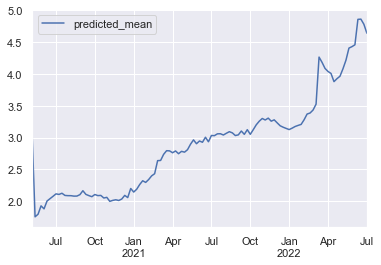

In [98]:
gas_train_predict.plot()

In [99]:
gas_forecast = gas_train_model_fit.forecast(steps=500)
gas_forecast = pd.DataFrame(gas_forecast)
gas_forecast

,predicted_mean
2022-07-11,4.585977
2022-07-18,4.559385
2022-07-25,4.548783
2022-08-01,4.536147
2022-08-08,4.528906
...,...
2032-01-05,3.186597
2032-01-12,3.186016
2032-01-19,3.185437
2032-01-26,3.184862


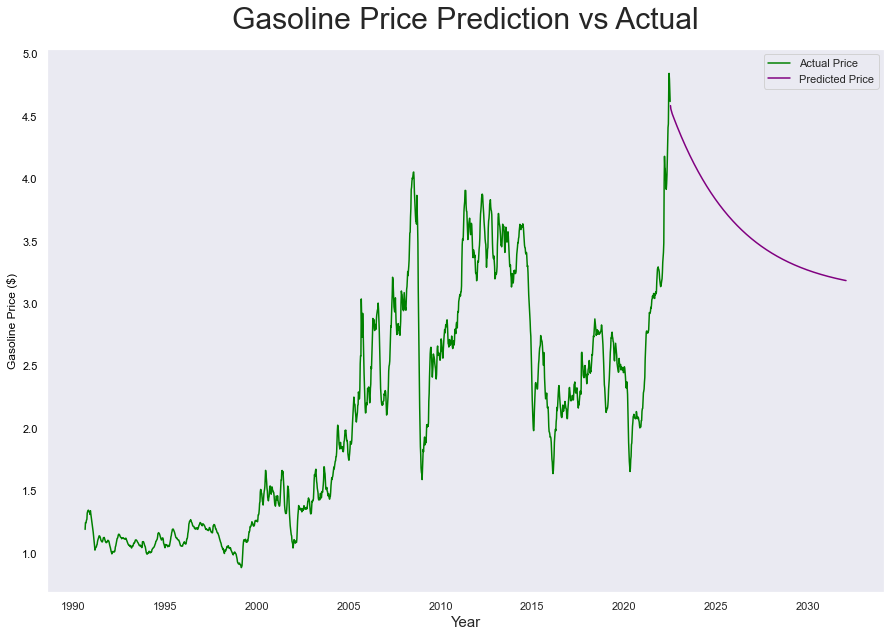

In [100]:

fig, ax2 = plt.subplots(figsize=(15, 10))

ax2.set_title('Gasoline Price Prediction vs Actual', pad = 20, fontsize = 30) 
color = 'black'
ax2.set_ylabel('Gasoline Price ($)', color = color)
ax2.plot(df['EIA Gasoline'], color = "green")
ax2.plot(gas_forecast.index, gas_forecast['predicted_mean'], color = 'purple')

ax2.tick_params(axis ='y', labelcolor = color)
plt.legend(['Actual Price', 'Predicted Price', 'Test', 'Preidcted']);
ax2.set_xlabel('Year', fontsize = 15)
plt.grid()

In [101]:
gas_forecast2 = gas_train_model_fit.forecast(steps=1658)
gas_forecast2 = pd.DataFrame(gas_forecast2)
gas_forecast2

,predicted_mean
2022-07-11,4.585977
2022-07-18,4.559385
2022-07-25,4.548783
2022-08-01,4.536147
2022-08-08,4.528906
...,...
2054-03-16,3.075389
2054-03-23,3.075388
2054-03-30,3.075387
2054-04-06,3.075385


In [102]:
test_df_error = train_df[1:]
test_df_error.mean()



EIA Gasoline    2.907268
dtype: float64

In [103]:
rmse = sqrt(mean_squared_error(df, gas_forecast2))
rmse

1.5998210516027755

Our Root mean square error was 1.59 dollars. This tells us that the price my future gas is off by an average of a $1.59.

Although the error seems high, it still keeps the prediction above the target line of $2.50